<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import python_files.ValidationOperations as valop


In [2]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [3]:
dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,RetiredLastA,RetiredLastB,PlayedA>PlayedB,WonRatioA>WonRatioB,PlayedCourtA>PlayedCourtB,WonRatioCourtA>WonRatioCourtB,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankFilledA', 'RankFilledB',
       'PtsFilledA', 'PtsFilledB', 'MaxFilledA', 'MaxFilledB',
       'AvgFilledA', 'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard',
       'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R.B', 'NISHIKORI K.A',
       'NISHIKORI K.B', 'MONFILS G.A', 'MONFILS G.B', 'FERRERO J.C.A',
       'FERRERO J.C.B', 'ROBREDO T.A', 'ROBREDO T.B', 'NALBANDIAN D.A',
       'NALBANDIAN D.B', 'RAONIC M.A', 'RAONIC M.B', 'AGASSI A.A',
       'AGASSI A.B', 'HAAS T.A', 'HAAS T.B', 'ISNER J.A', 'ISNER

Best Max csvID: 0 - Accuracy: 0.6944347217360868
Wall time: 1min 9s


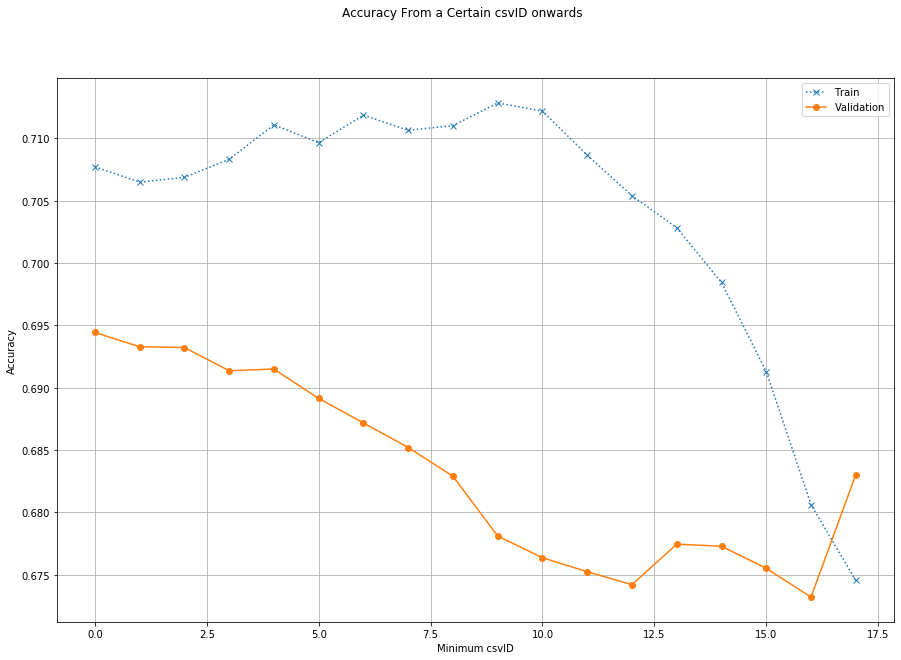

In [5]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [6]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,RetiredLastA,RetiredLastB,PlayedA>PlayedB,WonRatioA>WonRatioB,PlayedCourtA>PlayedCourtB,WonRatioCourtA>WonRatioCourtB,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree

Best Max Depth: 5 - Accuracy: 0.6944347217360868
Best Max Features: 31 - Accuracy: 0.694726402986816
Wall time: 20.8 s


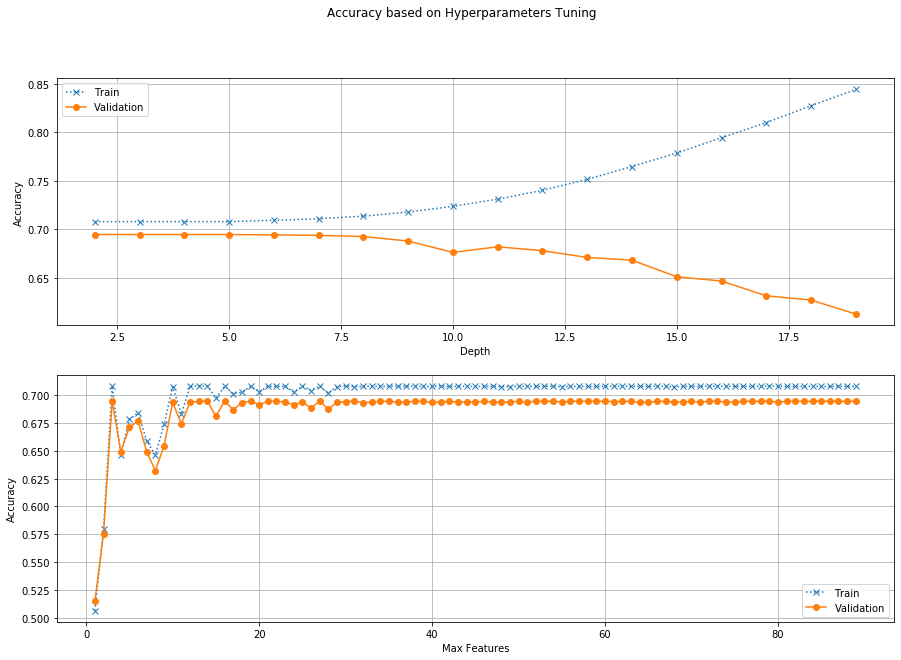

In [7]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 20.9 s


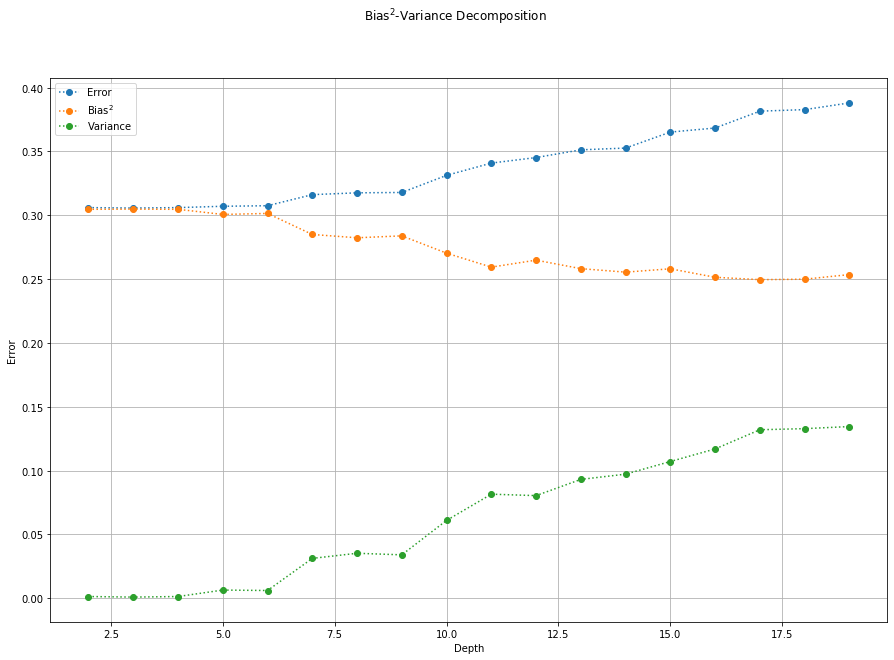

In [8]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.get_tree_variance_bias_decomposition(dataframe)

## Bagging

Best Number of Estimators: 225 - Accuracy: 0.6937930229844825
Wall time: 1min 55s


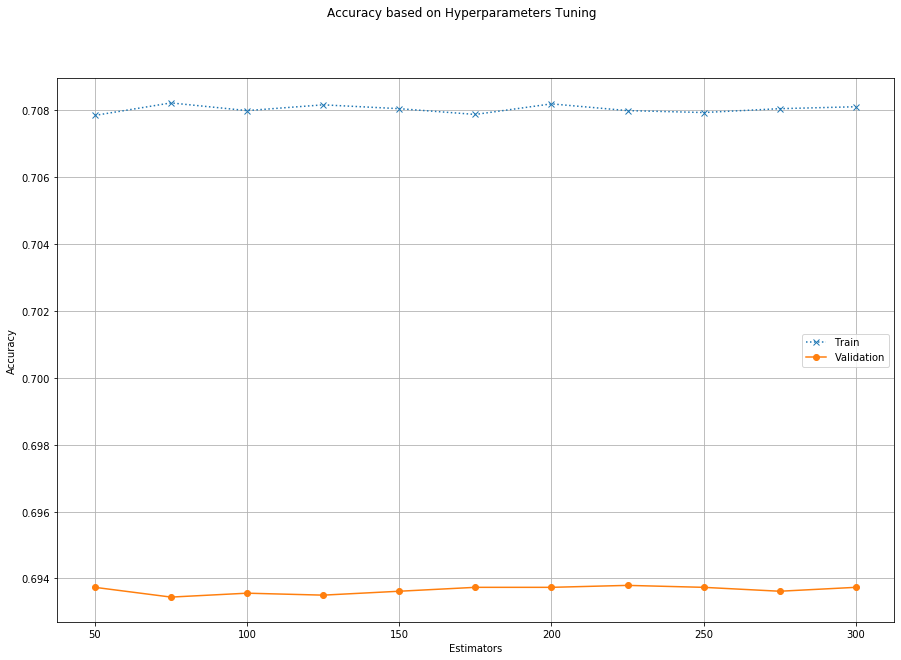

In [9]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

Wall time: 2min 53s


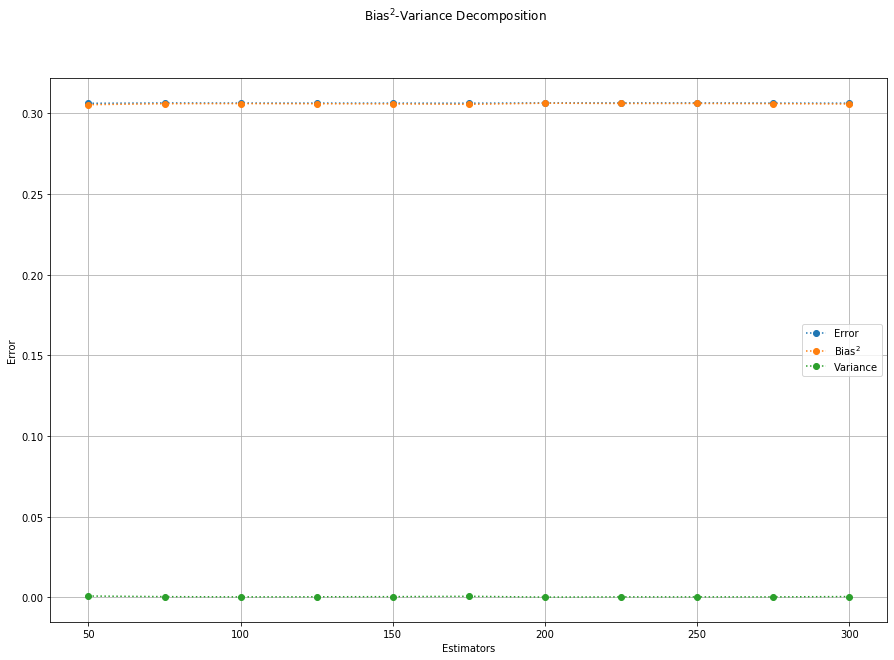

In [10]:
%%time
valop.get_bagged_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

## AdaBoost

Best Number of Estimators: 3 - Accuracy: 0.6937930229844825
Wall time: 25.2 s


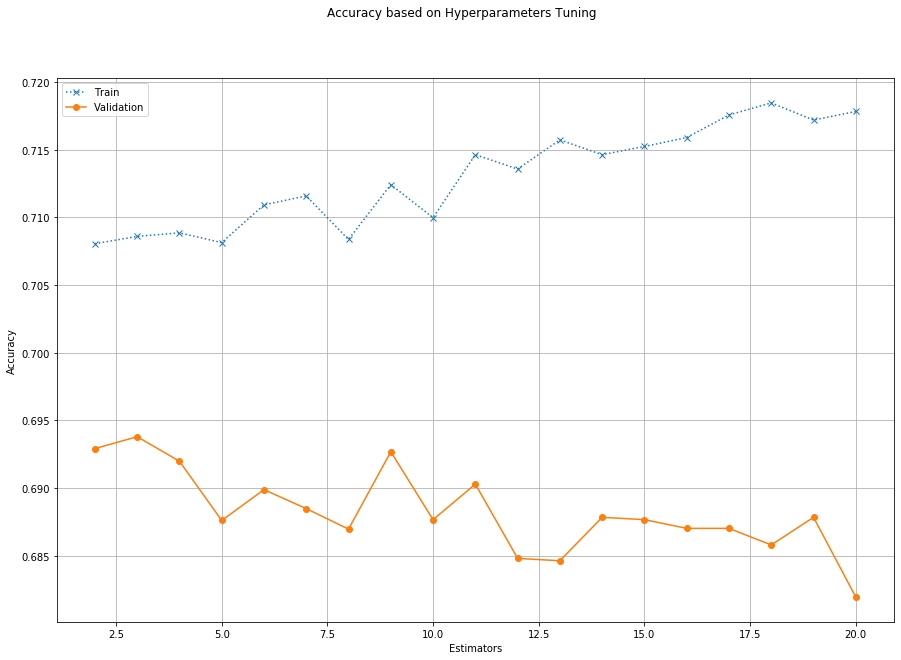

In [11]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 45.2 s


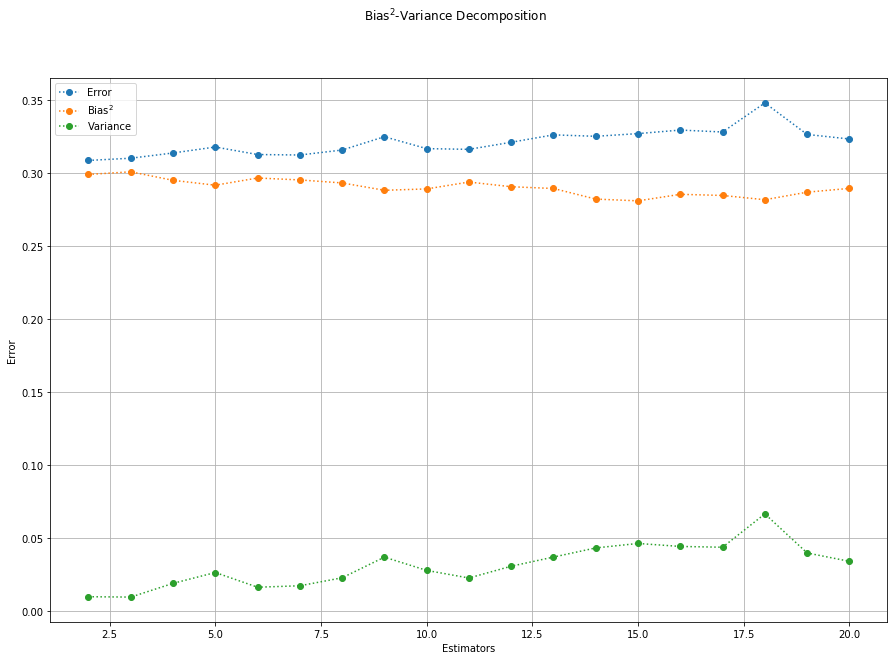

In [12]:
%%time
valop.get_boosted_tree_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']))

## Random Forest

Best Estimators Number 225 - Accuracy: 0.6649749154124373
Best Depth 12 - Accuracy: 0.694726402986816
Wall time: 2min 35s


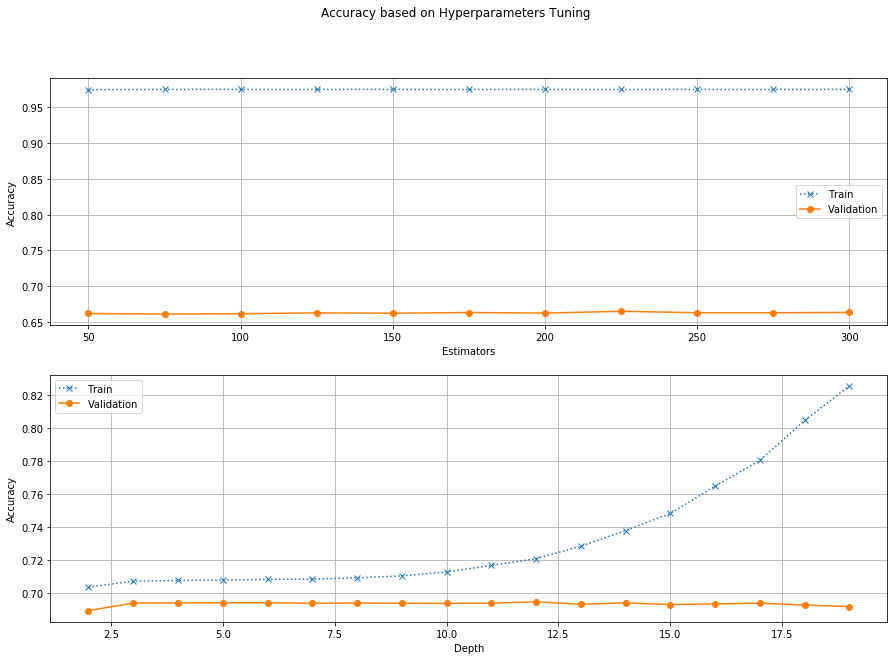

In [13]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)


Wall time: 2min 27s


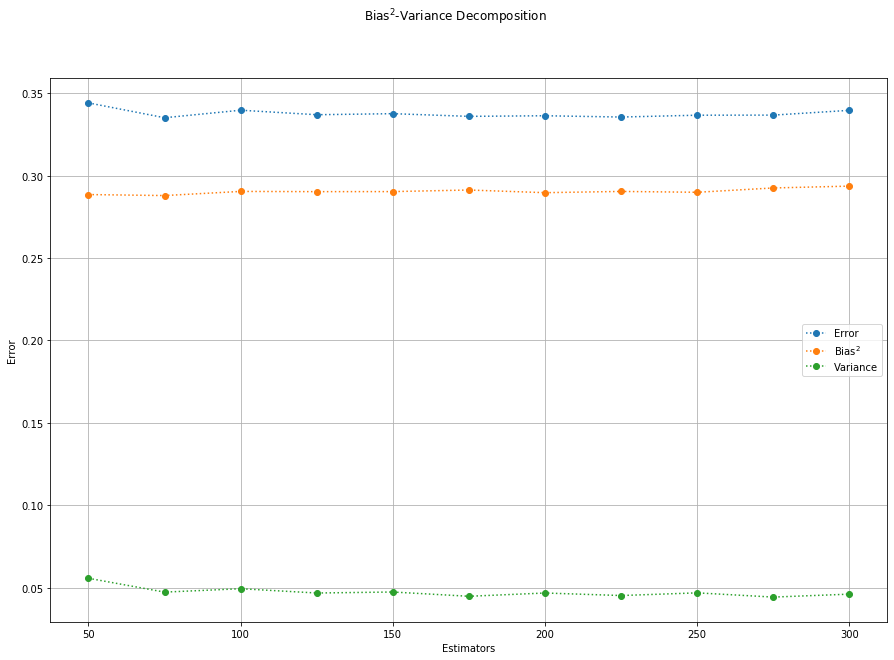

In [14]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe)

Wall time: 2min 44s


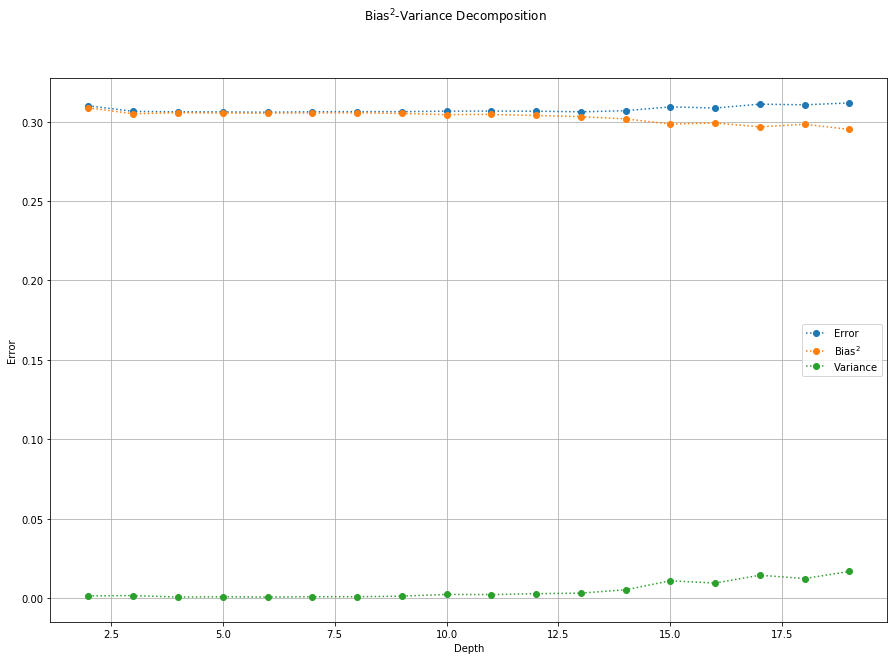

In [15]:
%%time
valop.get_forest_variance_bias_decomposition(dataframe, forest_best_features['n_estimators'])

## Feature Importances e Recursive Feature Elimination

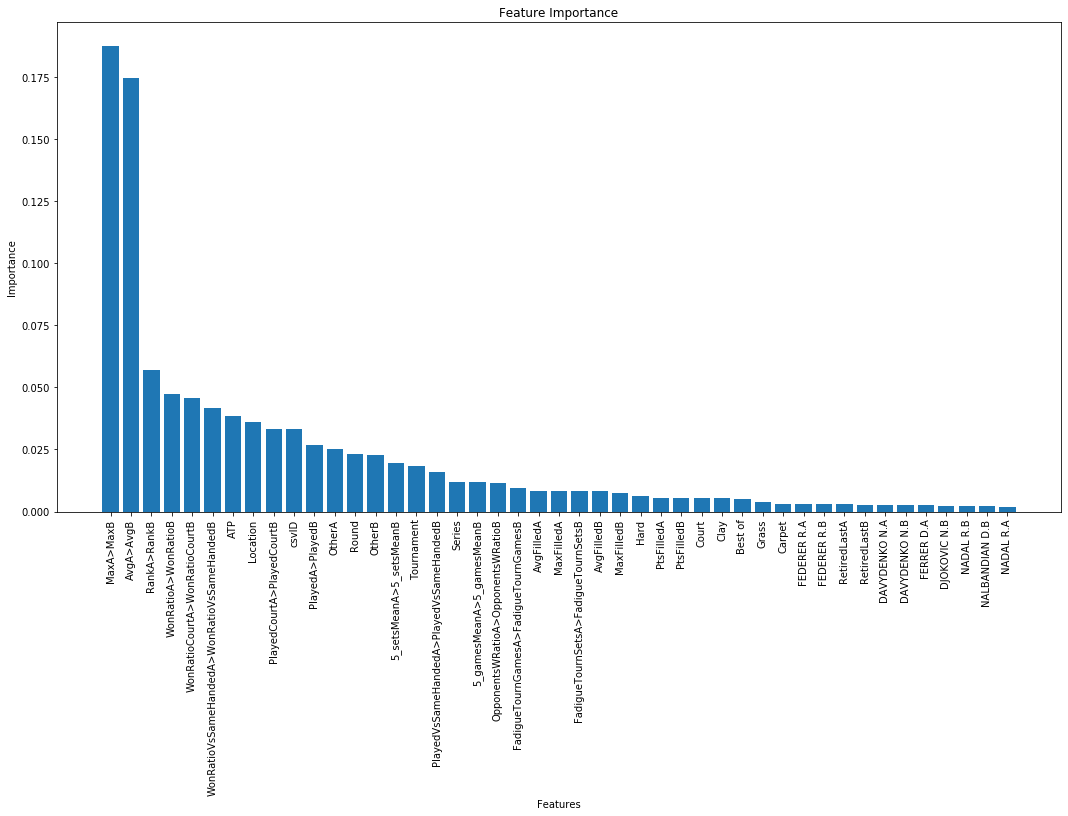

Wall time: 7.56 s


In [75]:
%%time

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def get_best_features():
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)

    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    rf.fit(x,y)

    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = [x.columns[i] for i in indices]

    plt.figure(figsize=(18,9))
    plt.title("Feature Importance")
    plt.bar(range(x.shape[1]), importances[indices])
    plt.xticks(range(x.shape[1]), features, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
get_best_features()

In [21]:
%%time
from sklearn.feature_selection import RFE

def get_best_features_RFE():
    
    x, _, y, _ = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                              dataframe['Winner'], test_size=0.33, shuffle=False,
                                                              stratify=None)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

    
    selector = RFE(rf, step=1, n_features_to_select=None)

    selector.fit(x,y)

    features = x.columns.values[selector.support_]

    features = np.append(features,['Winner'])

    print('Selected features by RFE:')
    print(features)
    return features

features = get_best_features_RFE()

Selected features by RFE:
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Carpet' 'Clay' 'Grass' 'Hard' 'FEDERER R.A' 'FEDERER R.B'
 'NADAL R.A' 'NADAL R.B' 'DJOKOVIC N.B' 'FERRER D.A' 'NALBANDIAN D.B'
 'DAVYDENKO N.A' 'DAVYDENKO N.B' 'OtherA' 'OtherB' 'RankA>RankB'
 'MaxA>MaxB' 'AvgA>AvgB' 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'RetiredLastA' 'RetiredLastB'
 'PlayedA>PlayedB' 'WonRatioA>WonRatioB' 'PlayedCourtA>PlayedCourtB'
 'WonRatioCourtA>WonRatioCourtB' '5_gamesMeanA>5_gamesMeanB'
 '5_setsMeanA>5_setsMeanB' 'PlayedVsSameHandedA>PlayedVsSameHandedB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']
Wall time: 5min 22s


Best Estimators Number 175 - Accuracy: 0.6640415354101038
Best Depth 10 - Accuracy: 0.6942013767355034
Wall time: 1min 49s


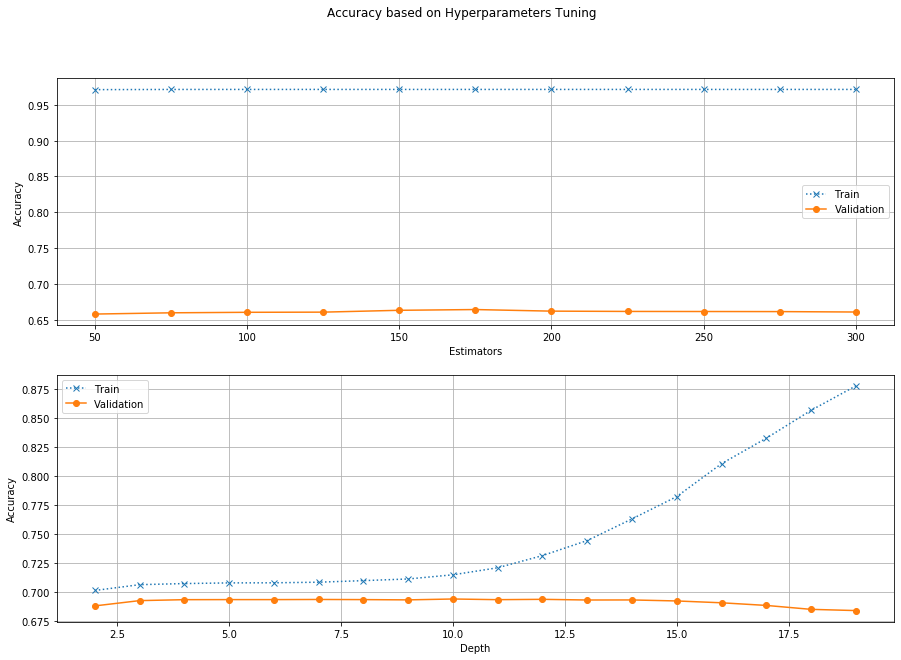

In [22]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

## Inspection of Prediction Results
Provo a misurare l'accuracy delle predizioni per le partite tra i giocatori più forti e per le partite tra i giocatori meno importanti, dal risultato è visibile come il modello predica più correttamente le partite giocate tra giocatori più forti ed abbia più difficoltà a predirre correttamente le partite giocate tra i giocatori più deboli.

Migliora ulteriormente l'accuracy per le partite dove almeno uno dei due giocatori è uno dei più importanti, questo probabilmente perché risulta più semplice prevedere il risultato della partita tra un giocatore forte e uno debole. 

In [53]:
dataframe = dataframe[features]

In [69]:
from sklearn.metrics import accuracy_score

def get_prediction_accuracy_on_best_players_matches(most_important = True, condition = 'or'):
    
    if most_important:
        binary_value = 1
    else:
        binary_value = 0
    
    x_train, x_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],
                                                          dataframe['Winner'], test_size=0.33, shuffle=False,
                                                          stratify=None)
    x_valid = x_valid.reset_index(drop = True)
    y_valid = y_valid.reset_index(drop = True)
    
    indexes_to_drop = []
    for v in x_valid.itertuples():
        if condition == 'or':
            if v.OtherA == binary_value or v.OtherB == binary_value:
                indexes_to_drop.append(v.Index)
        else:
            if v.OtherA == 1 and v.OtherB == 1:
                indexes_to_drop.append(v.Index)
            
    x_valid.drop(x_valid.index[indexes_to_drop], axis = 0, inplace = True)
    y_valid.drop(y_valid.index[indexes_to_drop], axis = 0, inplace = True)
    
    rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], 
                                max_depth = forest_best_features['max_depth'])

    rf.fit(x_train,y_train)
    
    score = accuracy_score(y_true=y_valid, y_pred=rf.predict(x_valid))
    
    if condition == 'or':
        if most_important:
            print('Accuracy on matches played by the most important players:', 
                  score)
        else:
            print('Accuracy on matches played by the least important players:', 
                  score)
    else:
        print('Accuracy on matches played by at least one important player:', 
                  score)
        
    return score

Accuracy on matches played by the most important players: 0.725
Accuracy on matches played by the least important players: 0.6617887508175277
Accuracy on matches played by at least one important player: 0.7708757637474541


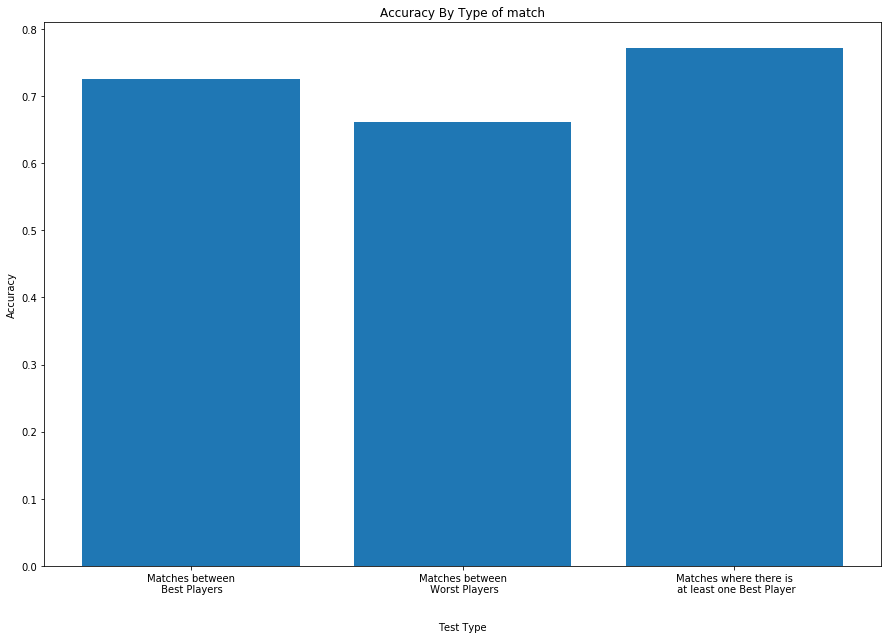

In [74]:
acc_best = get_prediction_accuracy_on_best_players_matches()
acc_worst = get_prediction_accuracy_on_best_players_matches(False)
acc_at_least_one_best = get_prediction_accuracy_on_best_players_matches(condition = 'and')

plt.figure(figsize=(15,10))
plt.title("Accuracy By Type of match")
plt.bar(range(3), [acc_best, acc_worst, acc_at_least_one_best])
plt.xticks(range(3), ['Matches between\n Best Players',
                     'Matches between\n Worst Players',
                     'Matches where there is\n at least one Best Player'])
plt.xlabel('\n\nTest Type')
plt.ylabel('Accuracy')
plt.show()